In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *
from functools import partial

In [2]:
dist_ratio = 0.5
Num_sensors = 5
Num_emitters = 2
sample_size = 100
# DOA in radian
theta1 = np.array([0.34906585, 1.22173048])
GS_1 = np.array([[2,0],[0,3]])
GN_1 = 0.1*np.eye(5, dtype=np.float64)

In [3]:
theta1

array([0.34906585, 1.22173048])

In [4]:
A1 = np.zeros((Num_sensors, Num_emitters),dtype=np.complex128)
for i in range(Num_emitters):
    A1[:,i] = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors) * np.sin(theta1[i]))

In [5]:
A1

array([[ 1.        +0.j        ,  1.        +0.j        ],
       [ 0.47618256-0.87934645j, -0.98210585-0.18832978j],
       [-0.54650034-0.83745888j,  0.92906379+0.36991955j],
       [-0.99665042+0.08177982j, -0.84277211-0.53827054j],
       [-0.40267475+0.91534313j,  0.72631905+0.68735773j]])

In [6]:
s1 = CN(Num_emitters,sample_size,GS_1)
n1 = CN(Num_sensors,sample_size,GN_1)
X1 = np.zeros((sample_size, 5), dtype=np.complex128)
for i in range(sample_size):
    X1[i] = A1 @ s1[i] + n1[i]

In [7]:
theta_estimate1 = EM(X1, GS_1, GN_1)

Initial theta = [[ 0.90568055]
 [-0.74927934]]
K=[[ 0.02091006+3.69286540e-15j -0.00472409+9.64185679e-04j]
 [-0.00472409-9.64185679e-04j  0.0209793 -9.80015839e-15j]]
theta_new=[ 0.97972975 -0.85441747]
Iteration=1
K=[[ 0.01983304-1.92313622e-16j -0.00067786-3.98218393e-04j]
 [-0.00067786+3.98218393e-04j  0.01989871+2.90784018e-15j]]
theta_new=[ 1.02885214 -0.93499545]
Iteration=2
K=[[0.02047322-1.85610436e-15j 0.00196389+3.15137381e-03j]
 [0.00196389-3.15137381e-03j 0.02054102+8.48941484e-15j]]
theta_new=[ 1.06423254 -0.99416546]
Iteration=3
K=[[0.02260406+4.72654786e-15j 0.00185019+7.75402103e-03j]
 [0.00185019-7.75402103e-03j 0.0226789 -1.07221156e-14j]]
theta_new=[ 1.090627   -1.03506751]
Iteration=4
K=[[0.02535814+1.69519592e-15j 0.00023803+1.18871222e-02j]
 [0.00023803-1.18871222e-02j 0.0254421 -8.58350247e-15j]]
theta_new=[ 1.11067975 -1.05901059]
Iteration=5
K=[[ 0.02789385+6.34266629e-16j -0.00168632+1.49538389e-02j]
 [-0.00168632-1.49538389e-02j  0.02798622-5.71856529e-17j]]

In [8]:
theta_estimate1

array([ 1.24496201, -0.87163422])

In [9]:
theta1

array([0.34906585, 1.22173048])

In [10]:
theta1-theta_estimate1

array([-0.89589616,  2.0933647 ])

In [11]:
np.sin(theta_estimate1)-np.sin(theta1)

array([ 0.60536385, -1.70507433])

In [12]:
theta2 = [0.5]
GS_2 = np.array([[0.7]])
GN_2 = 0.1*np.eye(5, dtype=np.float64)

In [13]:
A2 = np.zeros((5, 1),dtype=np.complex128)
for i in range(1):
    A2[:,i] = np.exp(-2j * np.pi * dist_ratio * np.arange(5) * np.sin(theta2[i]))

In [14]:
A2

array([[ 1.        +0.j        ],
       [ 0.06459158-0.99791178j],
       [-0.99165586-0.1289134j ],
       [-0.19269681+0.98125834j],
       [ 0.96676267+0.25567545j]])

In [15]:
s2 = CN(1,sample_size,GS_2)
n2 = CN(5,sample_size,GN_2)
X2 = np.zeros((sample_size, 5), dtype=np.complex128)
for i in range(sample_size):
    X2[i] = A2 @ s2[i] + n2[i]

In [16]:
W1, W2 = goal_function(X2, GS_2, GN_2, 50)

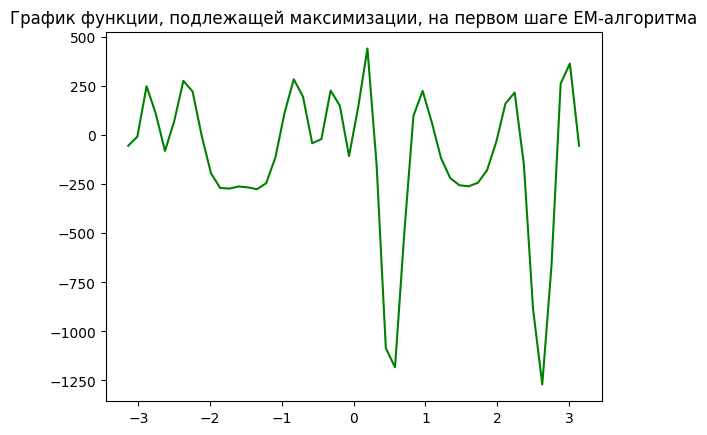

In [17]:
plt.title("График функции, подлежащей максимизации, на первом шаге ЕМ-алгоритма")
plt.plot(W1, W2.real, color='green')

In [18]:
theta_estimate2=EM(X2, GS_2, GN_2)

Initial theta = [[0.90568055]]
K=[[0.01944444-5.82867088e-17j]]
theta_new=[0.74992826]
Iteration=1
K=[[0.01944444+5.82867088e-17j]]
theta_new=[0.66058134]
Iteration=2
K=[[0.01944444-1.53002611e-16j]]
theta_new=[0.60497381]
Iteration=3
K=[[0.01944444-3.93435284e-16j]]
theta_new=[0.56917165]
Iteration=4
K=[[0.01944444-1.60288449e-16j]]
theta_new=[0.54565997]
Iteration=5
K=[[0.01944444+9.47159018e-17j]]
theta_new=[0.53015342]
Iteration=6
K=[[0.01944444+7.2858386e-17j]]
theta_new=[0.51982474]
Iteration=7
K=[[0.01944444+3.21791205e-17j]]
theta_new=[0.51292082]
Iteration=8
K=[[0.01944444-4.73579509e-17j]]
theta_new=[0.50831255]
Iteration=9
K=[[0.01944444-7.77156117e-17j]]
theta_new=[0.50521006]
Iteration=10
K=[[0.01944444-3.44863027e-16j]]
theta_new=[0.50313791]
Iteration=11
K=[[0.01944444+4.00721123e-16j]]
theta_new=[0.50173757]
Iteration=12
K=[[0.01944444-1.36002321e-16j]]
theta_new=[0.50085561]
Iteration=13
K=[[0.01944444+2.64718802e-16j]]
theta_new=[0.50021976]
Iteration=14
K=[[0.0194444

In [19]:
theta_estimate2

array([0.49904839])

In [20]:
np.abs(theta_estimate2-theta2)

array([0.00095161])